In [6]:
import numpy as np
from scipy import stats

# Scenario: A factory produces bolts with known population std = 0.5 mm
# The bolts should have a mean length of 50 mm
# Quality control suspects a machine is producing bolts that are too long

np.random.seed(42)

# Known population parameter (this is what makes it a z-test!)
population_std = 0.5  # mm - this is known from years of data

# Hypothesized mean under null hypothesis
null_mean = 50.0  # mm

# You collected a sample from the suspicious machine
sample_bolts = np.random.normal(loc=50.15, scale=population_std, size=35)

print("Sample statistics:")
print(f"Sample size: {len(sample_bolts)}")
print(f"Sample mean: {sample_bolts.mean():.3f} mm")
print(f"Sample std: {sample_bolts.std(ddof=1):.3f} mm")
print(f"\nKnown population std: {population_std} mm")
print(f"Null hypothesis mean: {null_mean} mm")

Sample statistics:
Sample size: 35
Sample mean: 50.084 mm
Sample std: 0.466 mm

Known population std: 0.5 mm
Null hypothesis mean: 50.0 mm


$$
z \;=\; \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}
$$

- $\displaystyle \bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$ is the sample mean.  
- $\mu_0$ is the null hypothesis mean (here $\mu_0 = 50.0$).  
- $\sigma$ is the population standard deviation — use the known population std, not the sample std.  
- $n$ is the sample size (number of observations in the sample).


### Task 1: Calculate the z-statistic manually
- Use the formula above
- Think about what each component represents
- Remember, use the POPULATION std, not the sample std

In [ ]:
alpha = 0.05
x_bar = np.mean(sample_bolts)
null_mean = 50.0
population_std = 0.5
n = len(sample_bolts)

z_stats = (x_bar - null_mean) / (population_std / np.sqrt(n))
print(f"Z-statistic (manual): {z_stats}")

Z-statistic (manual): 0.9900984553809732


### Task 2: Find the p-value
- Once you have your z-statistic, you need to find the probability
- Think: what distribution should you use? (Hint: it's not the t-distribution this time)
- Are we doing a one-tailed or two-tailed test? Why?

In [11]:
# Two-tailed test - we don't know if the difference is greater or lesser, we need a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))
if p_value < alpha:
    print(
        f"P-value {p_value} is smaller than threshold {alpha}, therefore we reject the null hypothesis"
    )
elif p_value >= alpha:
    print(
        f"P-value {p_value} is equal or greater to threshold {alpha}, therefore we fail to reject the null hypothesis."
    )

P-value 0.3221259982767526 is equal or greater to threshold 0.05, therefore we fail to reject the null hypothesis.


### Task 3: Compare with a t-test

- Run the same test but pretending you don't know the population std
- Use the sample std instead
- How different are the results? Why?

Formula:

$\large t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$

**Where:**

- $\bar{x}$ = sample mean (what we observed)
- $\mu_0$ = hypothesized population mean (what we're testing against)
- $s$ = sample standard deviation (our estimate of population variability)
- $n$ = sample size
- $s / \sqrt{n}$ = standard error of the mean (how much sample means typically vary)


In [10]:
alpha = 0.05
x_bar = np.mean(sample_bolts)
null_mean = 50.0
sd_sample = np.std(sample_bolts, ddof=1)
n = len(sample_bolts)

t_stats = (x_bar - null_mean) / (sd_sample / np.sqrt(n))
p_value = 2 * (1 - stats.t.cdf(abs(t_stats), df=n - 1))

if p_value < alpha:
    print(
        f"P-value {p_value} is smaller than threshold {alpha}, therefore we reject the null hypothesis"
    )
elif p_value >= alpha:
    print(
        f"P-value {p_value} is equal or greater to threshold {alpha}, therefore we fail to reject the null hypothesis."
    )

P-value 0.29550430196660127 is equal or greater to threshold 0.05, therefore we fail to reject the null hypothesis.


In [12]:
print(f"Population std (known): {population_std}")
print(f"Sample std (estimated): {sd_sample:.3f}")
print(f"Difference: {abs(population_std - sd_sample):.3f}")

Population std (known): 0.5
Sample std (estimated): 0.466
Difference: 0.034


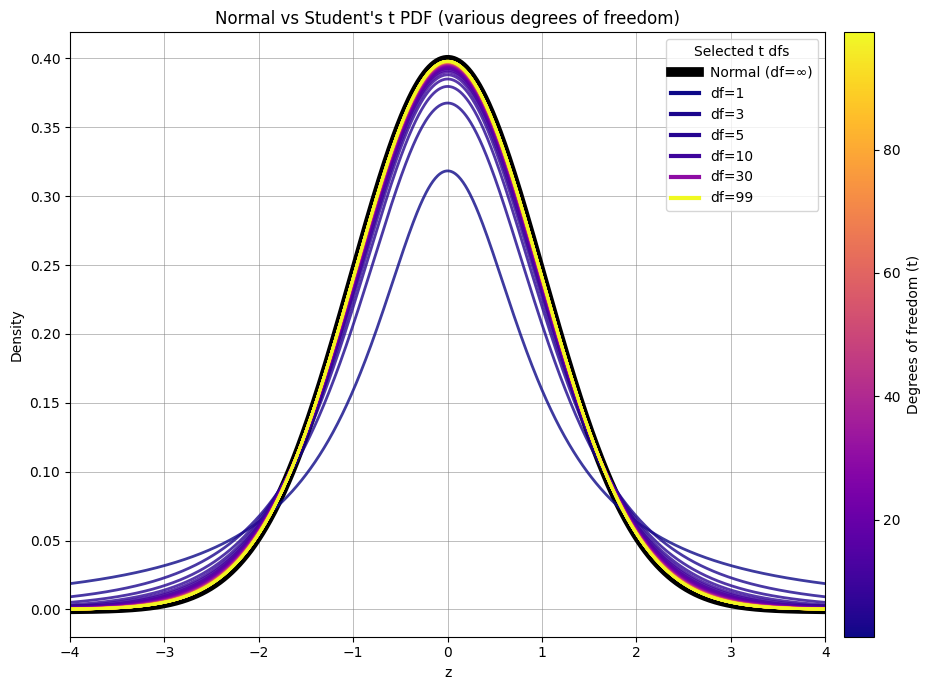

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Comparing normal and t-distribution PDFs
z_scores = np.linspace(-4, 4, 1000)

# plot normal and t PDFs for various degrees of freedom
normal_pdf = stats.norm.pdf(z_scores, loc=0, scale=1)


# Comparing normal and t-distribution PDFs
fig, ax = plt.subplots(figsize=(10, 7))

# plot normal
ax.plot(z_scores, normal_pdf, color="black", lw=7, label="Normal (df=∞)")

# create colormap for t dfs
dfs = np.arange(1, 100, 2)
cmap = plt.get_cmap("plasma")
norm = mpl.colors.Normalize(vmin=dfs.min(), vmax=dfs.max())

for freedom in dfs:
    y = stats.t.pdf(z_scores, df=freedom)
    ax.plot(z_scores, y, color=cmap(norm(freedom)), lw=2, alpha=0.8)

# colorbar to map colors -> degrees of freedom
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label("Degrees of freedom (t)")

# legend showing the normal line plus a few example t-df colors
example_dfs = [1, 3, 5, 10, 30, 99]
proxy_lines = [
    mpl.lines.Line2D([0], [0], color=cmap(norm(d)), lw=3) for d in example_dfs
]
proxy_normal = mpl.lines.Line2D([0], [0], color="black", lw=7)
ax.legend(
    [proxy_normal] + proxy_lines,
    ["Normal (df=∞)"] + [f"df={d}" for d in example_dfs],
    loc="upper right",
    title="Selected t dfs",
)

ax.set_xlim(-4, 4)
ax.set_xlabel("z")
ax.set_ylabel("Density")
ax.set_title("Normal vs Student's t PDF (various degrees of freedom)")
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")

plt.tight_layout()
plt.show()